In [86]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from neural.containers import Sequential
from neural.losses import CE, MSE
from neural.layers import TanH, Sigmoid, Dense, RELU
from neural.utils.preprocessing import Flatten, OneHotEncoder
import matplotlib.pyplot as plt 
import numpy as np

In [109]:
def plot_images(images, pred, actual, img_per_row=5):
    rows = len(images) // img_per_row
    fig, axes = plt.subplots(rows, img_per_row, figsize=(15 ,5))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.grid(False)
        ax.axis(False)
        ax.set_title(f'Predicted: {pred[i]} | Actual: {actual[i]}')
    plt.tight_layout()
    plt.show()

In [88]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


# only take a few 
x_train = x_train[0:1000]
y_train = y_train[0:1000]

In [35]:
# make encoder
encoder = OneHotEncoder()
encoder.fit(y_train)
# make flatterner 
flat = Flatten(input_shape=(28, 28))


In [89]:
# modify inputs / labels
y_train_encoded = encoder.encode(y_train)
x_train_flat = flat.forward(x_train)
x_test_flat = flat.forward(x_test)

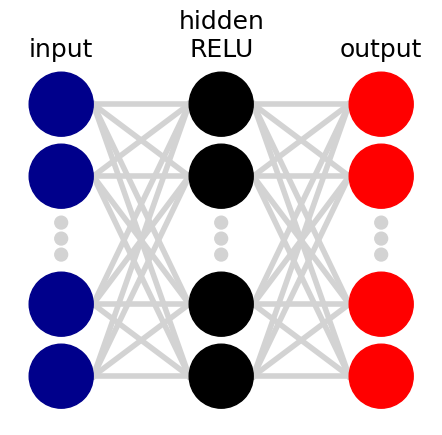

In [91]:
model = Sequential([
    Dense(28 * 28, 128),
    RELU(),
    Dense(128, 10)
])

model.display_network()

In [93]:
model.fit(x_train_flat, y_train_encoded, 300, .01, CE())

Epoch 0/300, Loss: 1.5033
Epoch 99/300, Loss: 0.0032
Epoch 199/300, Loss: 0.0007
Epoch 299/300, Loss: 0.0003


In [104]:
pred = np.argmax(model.predict(x_test_flat),axis=1)
accuracy = np.sum(pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8925


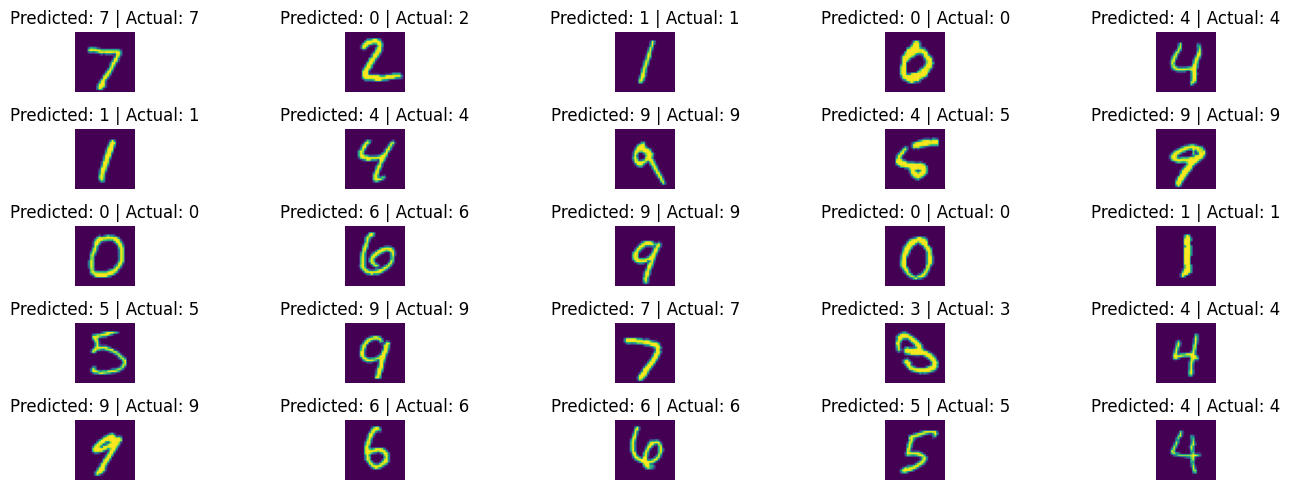

In [112]:
plot_images(x_test[:26], pred[:26], y_test[:26])

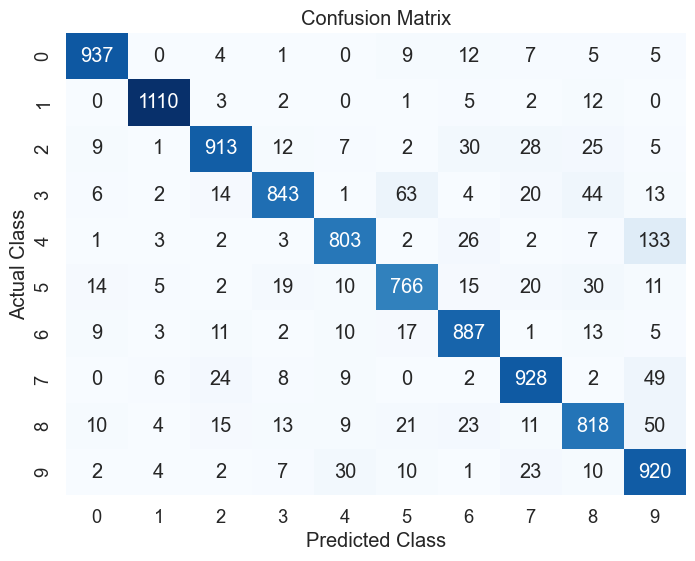

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()